# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [2]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [6]:
# show the first review
print data[0]
print 'type(data)=%s'%type(data)
print 'len(data)=%i'%len(data)
print 'type(data[0])=%s'%type(data[0])
print 'len(data[0])=%i'%len(data[0])
len([r for r in data if r['type']=='review'])

{u'votes': {u'funny': 0, u'useful': 5, u'cool': 2}, u'user_id': u'rLtl8ZkDX5vH5nAx9C3q5Q', u'review_id': u'fWKvX83p0-ka4JS3dc6E5A', u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever

10000

In [8]:
# convert the list of dictionaries to a DataFrame
datadf = pd.DataFrame(data)
datadf.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [80]:
# add DataFrame columns for cool, useful, and funny
datadf['cool']=0 # create new columns with arbitrary value
datadf['useful']=0
datadf['funny']=0
nRows = len(datadf)
for iRow in range(nRows): #iterate over all the rows of the dataframe and set correct values
    datadf.loc[iRow,'cool']=datadf.votes[iRow]['cool']
    datadf.loc[iRow,'useful']=datadf.votes[iRow]['useful']
    datadf.loc[iRow,'funny']=datadf.votes[iRow]['funny']
datadf.head()

,business_id,date,review_id,stars,text,type,user_id,votes,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}",1,2,0


In [81]:
# drop the votes column and then display the head
datadf.drop('votes',axis=1,inplace=True)
datadf.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [84]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
yelp.groupby('stars').mean() #displays mean of numeric columns: cool, useful, funny

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


C:\Users\Pop\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


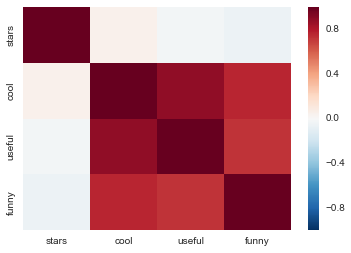

In [86]:
# display a correlation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
#yelp.corr()
sns.heatmap(yelp.corr())

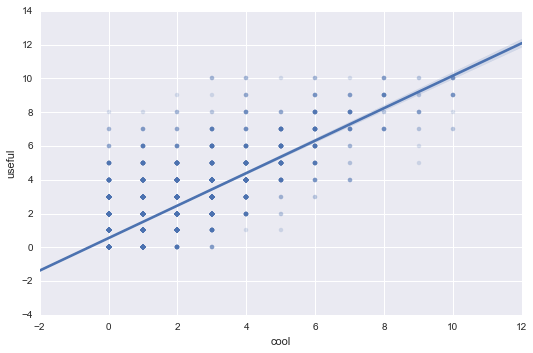

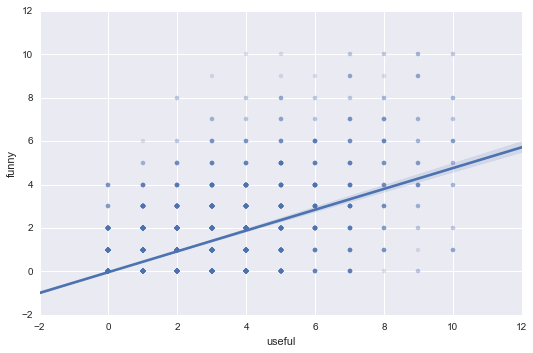

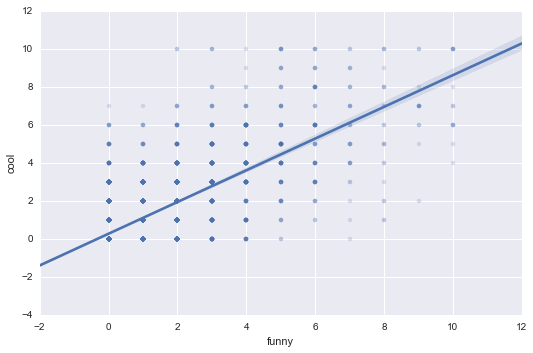

In [92]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.lmplot(x='cool', y='useful', data=yelp[(yelp.cool<11)&(yelp.useful<11)], aspect=1.5, scatter_kws={'alpha':0.2})
sns.lmplot(x='useful', y='funny', data=yelp[(yelp.useful<11)&(yelp.funny<11)], aspect=1.5, scatter_kws={'alpha':0.2})
sns.lmplot(x='funny', y='cool', data=yelp[(yelp.funny<11)&(yelp.cool<11)], aspect=1.5, scatter_kws={'alpha':0.2})

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [93]:
X = yelp[['cool','useful','funny']]
y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [95]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [96]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [97]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [98]:
# calculate RMSE with all three features
train_test_rmse(['cool','useful','funny'])

1.173368627419449

## Task 6

Try removing some of the features and see if the RMSE improves.

In [106]:
print train_test_rmse(['cool','useful'])
print train_test_rmse(['cool','funny'])
print train_test_rmse(['useful','funny'])
print train_test_rmse(['cool'])
print train_test_rmse(['useful'])
print train_test_rmse(['funny'])

1.18537944234
1.1851949299
1.20070113589
1.20049049928
1.20143488625
1.20043591364


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [105]:
# new feature: 
yelp['text_len'] = 0 # create new column with arbitrary value
nRows = len(yelp)
for iRow in range(nRows): #iterate over all the rows of the dataframe
    yelp.loc[iRow,'text_len']=len(yelp.text[iRow]) #and set correct value
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,423
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,471


In [107]:
# new features: 
yelp['useful_plus_funny'] = yelp.useful + yelp.funny
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len,useful_plus_funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895,5
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,423,2
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,471,0


In [108]:
# add new features to the model and calculate RMSE
print train_test_rmse(['text_len'])
print train_test_rmse(['useful_plus_funny'])
print train_test_rmse(['text_len','useful_plus_funny'])

1.19381600525
1.20071890775
1.19373185043


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [115]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
print y_null

# compute RMSE for the null model
np.sqrt(metrics.mean_squared_error(y_test, y_null))

[ 3.7808  3.7808  3.7808 ...,  3.7808  3.7808  3.7808]


1.2019781029619465

## Task 9 (Bonus)

Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [ ]:
# import and instantiate KNN


In [ ]:
# note: classification models will automatically treat the response value (1/2/3/4/5) as unordered categories


## Task 10 (Bonus)

Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.